Universidad Galileo

Statistical Learning II

PAPD - Sección V

Sergio José Barrios Martínez

Carnet No. 19012765

## Artificial Neural Networks

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Parte No. 1
#### Calcular la salida de un MLP
- Utilizando Numpy definir una función para calcular la salida de los siguientes modelos.
- Dado que cada sub-modelo "detecta" una característica intermedia **h** (variable latente), determinar para cada entrada la característica intermedia con mayor presencia.


#### Red Neuronal No. 1

<img src="Images\ANN1.png">

#### Función de Activación: Sigmoidal

In [118]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [231]:
def ANN1(vector_x):
    
    # Se agrega el bias al vector de entrada
    vector_x_bias = np.transpose(np.vstack([vector_x,[1]]))
    
    # Ensamble de Parámetros por Neurona h_i en una sola Matriz
    parametros_h1 = np.transpose(np.array([[5,-2,-8]]))
    parametros_h2 = np.transpose(np.array([[7,-3,1]]))
    parametros_capa1 = np.hstack([parametros_h1,parametros_h2])
    
    # Multiplicación Matricial para Vector "h" de Variables Latentes
    vector_h=sigmoid(np.matmul(vector_x_bias,parametros_capa1))
    print("Variables latentes:",vector_h)
    
    # Determinación de Característica con Mayor Presencia
    print("La característica intermedia con mayor presencia es: h",np.argmax(vector_h)," con valor",vector_h[0][np.argmax(vector_h)])
    
    # Se agrega el bias al vector h
    vector_h_bias = np.hstack([vector_h,[[1]]])   
    
    # Ensamble de Parámetros para Calcular la Salida
    parametros_capa2 = np.transpose(np.array([[7,5,-6]]))
    
    # Multiplicación Matricial para Salida
    salida = sigmoid(np.matmul(vector_h_bias,parametros_capa2))
    print("Valor de Salida Aproximada:",salida[0][0])
        
    return salida

In [249]:
Entrada_ANN1 = np.array([[0.5],[0.6]])

In [250]:
Salida_ANN1 = ANN1(Entrada_ANN1)

Variables latentes: [[0.0012294  0.93702664]]
La característica intermedia con mayor presencia es: h 1  con valor 0.9370266439430035
Valor de Salida Aproximada: 0.21311318840259086


In [251]:
Salida_ANN1

array([[0.21311319]])

#### Red Neuronal No. 2

<img src="Images\ANN2.png">

In [242]:
def ANN2(vector_x):
    
    X = np.transpose(vector_x)
    
    # Ensamble de Parámetros por Neurona h_i en una sola Matriz
    parametros_h1 = np.transpose(np.array([[0.8,0.2]]))
    parametros_h2 = np.transpose(np.array([[0.4,0.9]]))
    parametros_h3 = np.transpose(np.array([[0.3,0.5]]))
    parametros_capa1 = np.hstack([parametros_h1,parametros_h2,parametros_h3])
    
    # Multiplicación Matricial para Vector "h" de Variables Latentes
    vector_h=sigmoid(np.matmul(X,parametros_capa1))
    print("Variables latentes:",vector_h)
    
    # Determinación de Característica con Mayor Presencia
    print("La característica intermedia con mayor presencia es: h",np.argmax(vector_h)," con valor",vector_h[0][np.argmax(vector_h)])
    
    # Ensamble de Parámetros para Calcular la Salida
    parametros_capa2 = np.transpose(np.array([[0.3,0.5,0.9]]))
    
    # Multiplicación Matricial para Salida
    salida = sigmoid(np.matmul(vector_h,parametros_capa2))
    print("Valor de Salida Aproximada:",salida[0][0])
        
    return salida

In [252]:
Entrada_ANN2 = np.array([[0.5],[0.5]])
Salida_ANN2 = ANN2(Entrada_ANN2)

Variables latentes: [[0.62245933 0.65701046 0.59868766]]
La característica intermedia con mayor presencia es: h 1  con valor 0.6570104626734988
Valor de Salida Aproximada: 0.7415541370613938


In [253]:
Salida_ANN2

array([[0.74155414]])

### Parte No. 2:
#### Revisitando la función XOR
- Por su simplicidad y dominio pequeño, seguiremos usando XOR como ejemplo.
- Asumamos que bajo un proceso de entrenamiento(aún por definir) ya se han encontrado los pesos de una red neuronal como se ve en la siguiente imagen.
- Calcular para cada posible punto en el dominio de XOR la salida intermedia H = [h1,h2]
- Mostrar la matriz resultante H en el notebook.
- Graficar cada punto de la representación intermedia(scatter), usar diferente color y/o marker según su etiqueta Y. Puesto que Y tiene 2 posibles valores, la gráfica debe tener 2 colores o markers.
- Analizar el resultado intermedio, concluir y comentar opiniones.

**Nota**: usar solo código vectorizado (producto punto, multiplicación matricial ,ufuncs) 



<img src="Images\ANN3.png">

In [342]:
def ANN3(vector_x):
    
    # Se agrega el bias al vector de entrada
    vector_x_bias = np.transpose(np.vstack([vector_x,[1]]))
    
    # Ensamble de Parámetros por Neurona h_i en una sola Matriz
    parametros_h1 = np.transpose(np.array([[20,20,-10]]))
    parametros_h2 = np.transpose(np.array([[-20,-20,30]]))
    parametros_capa1 = np.hstack([parametros_h1,parametros_h2])
    
    # Multiplicación Matricial para Vector "h" de Variables Latentes
    vector_h=sigmoid(np.matmul(vector_x_bias,parametros_capa1))
    
    # Se agrega el bias al vector h
    vector_h_bias = np.hstack([vector_h,[[1]]])
    
    # Ensamble de Parámetros para Calcular la Salida
    parametros_capa2 = np.transpose(np.array([[20,20,-30]]))
    
    # Multiplicación Matricial para Salida
    salida = sigmoid(np.matmul(vector_h_bias,parametros_capa2))
        
    return vector_h,salida

In [343]:
Entrada_ANN3 = np.array([[1],[1]])
Salida_ANN3 = ANN3(Entrada_ANN3)

In [514]:
def representacion_intermedia_XOR(dominio_x):

    representacion_intermedia = []
    salida = []
    
    # Cálculo de Representación Intermedia (h1,h2)
    for i in dominio_x:
        entrada = np.expand_dims(i,1)
        vector_h,estimacion = ANN3(entrada)
        representacion_intermedia.append(vector_h)
        salida.append(estimacion)
    
    representacion_intermedia = np.reshape(np.array(representacion_intermedia),(4,2))
    salida=np.reshape(np.array(salida),(4,1))
    
    # Dataframe del Dominio de la función con Labels
    x1_dominio = dominio_x[:,0]
    x2_dominio = dominio_x[:,1]
    categoria_dominio = np.around(salida[:,0])
    data_dominio = pd.DataFrame({"x1": x1_dominio, "x2": x2_dominio, "Categoria": categoria_dominio})
    display(data_dominio)  
    
    # Dataframe de la Representación Intermedia de la función con Labels
    h1_intermedio = representacion_intermedia[:,0]
    h2_intermedio = representacion_intermedia[:,1]
    categoria_intermedio = np.around(salida[:,0])
    data_intermedio = pd.DataFrame({"h1": h1_intermedio, "h2": h2_intermedio, "Categoria": categoria_intermedio})
    display(data_intermedio)
     
    # Gráfica de Representaciones    
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    fig.suptitle('Transformación de Características a Espacio Latente [x1,x2] --> [h1,h2]')
   
    grupos_dominio = data_dominio.groupby("Categoria")
    for name, group in grupos_dominio:
        axs[0].plot(group["x1"], group["x2"], marker="o", linestyle="", label=name)
    axs[0].set_xlabel("x1")
    axs[0].set_ylabel("x2")
    axs[0].legend(loc=(0.5,0.5))
    
    grupos_intermedio = data_intermedio.groupby("Categoria")
    for name, group in grupos_intermedio:
        axs[1].plot(group["h1"], group["h2"], marker="o", linestyle="", label=name)
    axs[1].set_xlabel("h1")
    axs[1].set_ylabel("h2")
    axs[1].legend(loc=(0.5,0.5))
    
    plt.show()
    
    return True

In [515]:
dominio_XOR = np.array([[0,0],[0,1],[1,0],[1,1]])

,x1,x2,Categoria
0,0,0,0.0
1,0,1,1.0
2,1,0,1.0
3,1,1,0.0


,h1,h2,Categoria
0,0.000045,1.000000,0.0
1,0.999955,0.999955,1.0
2,0.999955,0.999955,1.0
3,1.000000,0.000045,0.0


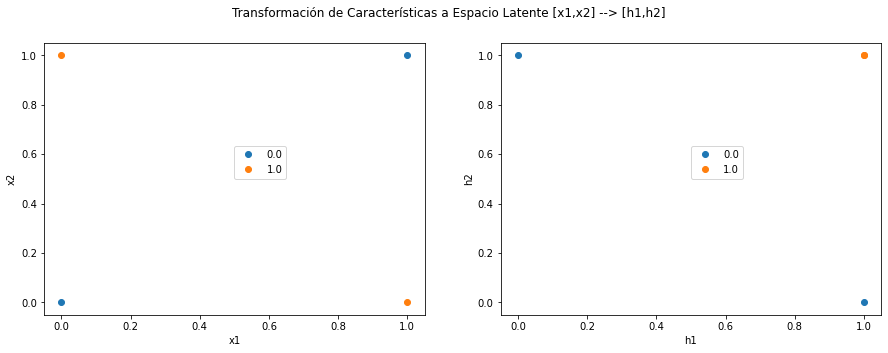

True

In [516]:
representacion_intermedia_XOR(dominio_XOR)

#### Conclusiones:
- Se pudo comprobar cómo las variables de entrada x1 y x2 fueron llevadas a un espacio latente, con representaciones intermedias h1 y h2, por la red neuronal.
- Un problema no linealmente separable en la representación normal (x1,x2) se transformó en un problema linealmente separable en la representación intermedia (h1,h2).
- En la representación intermedia h1,h2, se puede observar cómo se mapean los puntos distintos en el espacio (x1,x2): (0,1) y (1,0) (representados en color naranja) a un único punto en el espacio intermedio (h1,h2): (1,1). Esto **redujo el número de puntos en la representación intermedia del espacio latente**, permitiendo la separación lineal.